In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv("/content/main.csv")
df.head()

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume
0,1609459200000,28923.63,28961.66,28913.12,28961.66,27.457032,1609459259999,7.943820e+05,1292,16.777195,485390.826825
1,1609459260000,28961.67,29017.50,28961.01,29009.91,58.477501,1609459319999,1.695803e+06,1651,33.733818,978176.468202
2,1609459320000,29009.54,29016.71,28973.58,28989.30,42.470329,1609459379999,1.231359e+06,986,13.247444,384076.854453
3,1609459380000,28989.68,28999.85,28972.33,28982.69,30.360677,1609459439999,8.800168e+05,959,9.456028,274083.075142
4,1609459440000,28982.67,28995.93,28971.80,28975.65,24.124339,1609459499999,6.992262e+05,726,6.814644,197519.374888


In [2]:
ادم = "adam"

In [3]:
df.isnull().sum()

Open Time                       0
Open                            0
High                            0
Low                             0
Close                           0
Volume                          0
Close Time                      0
Quote asset volume              0
Number of trades                0
Taker buy base asset volume     0
Taker buy quote asset volume    0
dtype: int64

In [4]:
df.columns[5:]

Index(['Volume', 'Close Time', 'Quote asset volume', 'Number of trades',
       'Taker buy base asset volume', 'Taker buy quote asset volume'],
      dtype='object')

In [5]:
df.dropna(subset=['Volume', 'Close Time', 'Quote asset volume', 'Number of trades',
       'Taker buy base asset volume', 'Taker buy quote asset volume'], inplace=True)


In [6]:
df.isnull().sum()

Open Time                       0
Open                            0
High                            0
Low                             0
Close                           0
Volume                          0
Close Time                      0
Quote asset volume              0
Number of trades                0
Taker buy base asset volume     0
Taker buy quote asset volume    0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
from datetime import datetime as dt
def calculate_time(timestamp):
    return dt.fromtimestamp(timestamp/1000)

In [9]:
open_date = []
for i in df["Open Time"]:
    open_date.append(calculate_time(i))
df["Open Time"] = open_date

close_date = []
for i in df["Close Time"]:
    close_date.append(calculate_time(i))
df["Close Time"] = close_date

df.head()

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume
0,2021-01-01 00:00:00,28923.63,28961.66,28913.12,28961.66,27.457032,2021-01-01 00:00:59.999,7.943820e+05,1292,16.777195,485390.826825
1,2021-01-01 00:01:00,28961.67,29017.50,28961.01,29009.91,58.477501,2021-01-01 00:01:59.999,1.695803e+06,1651,33.733818,978176.468202
2,2021-01-01 00:02:00,29009.54,29016.71,28973.58,28989.30,42.470329,2021-01-01 00:02:59.999,1.231359e+06,986,13.247444,384076.854453
3,2021-01-01 00:03:00,28989.68,28999.85,28972.33,28982.69,30.360677,2021-01-01 00:03:59.999,8.800168e+05,959,9.456028,274083.075142
4,2021-01-01 00:04:00,28982.67,28995.93,28971.80,28975.65,24.124339,2021-01-01 00:04:59.999,6.992262e+05,726,6.814644,197519.374888


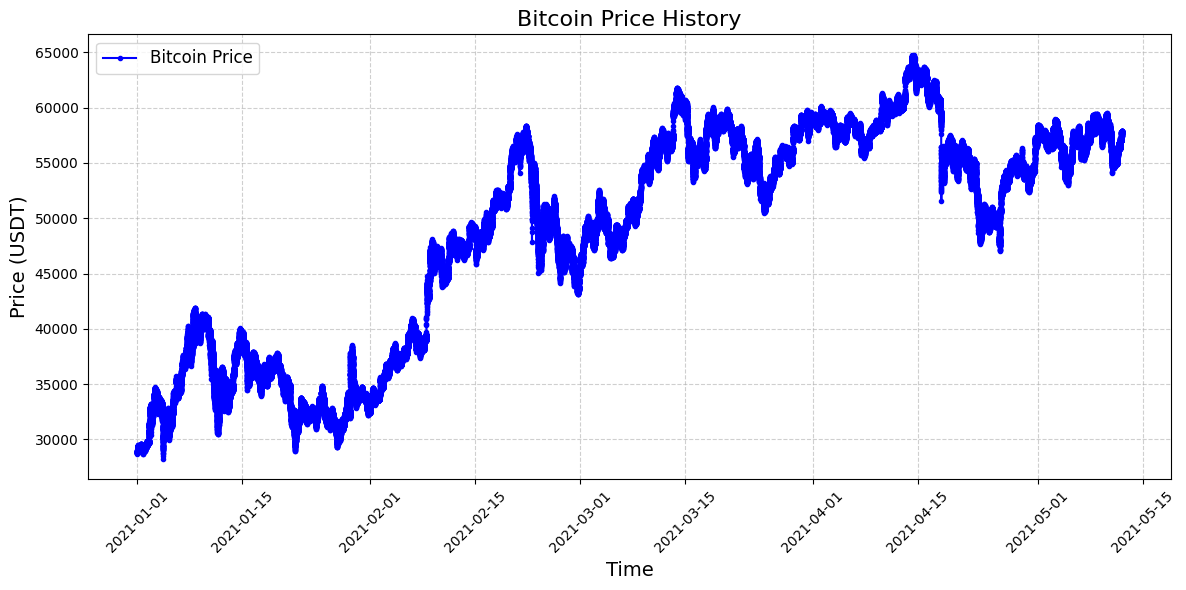

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.title("Bitcoin Price History", fontsize=16)
plt.plot(df["Close Time"], df["Close"], color='b', linestyle='-', marker='o', markersize=3, label='Bitcoin Price')
plt.xlabel("Time", fontsize=14)
plt.ylabel("Price (USDT)", fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(loc='upper left', fontsize=12)
plt.tight_layout()
plt.show()


In [11]:
from sklearn.model_selection import train_test_split

X = df["Close Time"]
y = df["Close"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

print("Train set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)


Train set shape: (150653,) (150653,)
Test set shape: (37664,) (37664,)


In [12]:
X_train = X_train.to_numpy().reshape(-1, 1)
X_test = X_test.to_numpy().reshape(-1, 1)
y_train = y_train.to_numpy().reshape(-1, 1)
y_test = y_test.to_numpy().reshape(-1, 1)

In [13]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

model = Sequential()

model.add(LSTM(units=512, return_sequences=True, activation='relu', input_shape=(X_train.shape)))
model.add(LSTM(units=256, activation='relu', return_sequences=False))
model.add(Dense(units=1))


In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 150653, 512)       1052672   
                                                                 
 lstm_1 (LSTM)               (None, 256)               787456    
                                                                 
 dense (Dense)               (None, 1)                 257       
                                                                 
Total params: 1840385 (7.02 MB)
Trainable params: 1840385 (7.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
# Convert datetime values to timestamps
X_train_timestamps = X_train.astype('int64')
y_train_timestamps = y_train.astype('int64')

# Compile the model
model.compile(optimizer=ادم, loss="mean_squared_error", metrics=['mae'])

# Train the LSTM model
model.fit(X_train_timestamps, y_train_timestamps,
          epochs=5,
          batch_size=32,
          verbose=1)


Epoch 1/5
1401/4708 [=======>......................] - ETA: 24s - loss: nan - mae: nan

KeyboardInterrupt: 

In [ ]:
loss, mae = model.evaluate(X_test, y_test)

In [ ]:
predictions = model.predict(X_test)

In [ ]:
train = close[:train_close_len]
valid = close[train_close_len:]
valid["Predictions"] = predictions

plt.figure(figsize=(16, 8))
plt.title("LSTM Model Prediction", fontsize=16)
plt.xlabel("Time", fontsize=14)
plt.ylabel("USDT", fontsize=14)

plt.plot(df["Close Time"][:train_close_len], train["Close"], color='blue', label='Training Data')
plt.plot(df["Close Time"][train_close_len:], valid["Close"], color='green', label='Validation Data')
plt.plot(df["Close Time"][train_close_len:], valid["Predictions"], color='red', linestyle='--', label='Predictions')

plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45)

plt.show()


In [ ]:
from keras.layers import  Dropout


model_2 = Sequential()

model_2.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model_2.add(Dropout(0.2))

model_2.add(LSTM(100))
model_2.add(Dropout(0.2))

model_2.add(Dense(50, activation='relu'))
model_2.add(Dense(1))


In [ ]:
model_2.summary()

In [ ]:
model_2.compile(optimizer=ادم, loss='mean_squared_error', metrics=['mae'])